## HEART DISEASE MACHINE LEARNING CLASSIFICATION PROJECT



The goal of this project is to use machine learning to predict the presence or absence of heart disease.

Dataset Heart.csv was downloaded from Kaggle https://www.kaggle.com/ronitf/heart-disease-uci, while the original dataset came from the UCI webiste https://archive.ics.uci.edu/ml/datasets/Heart+Disease.  The dataset initially had 76 variables, however the data was manipulated and only 14 variables were kept for the purpose of this project.
Lets import the data first and have a look at the variables

In [2]:
#Import libraries
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 

In [3]:
#Import the dataset
heart_disease = pd.read_csv(r"C:\Users\Tanja\Documents\heart.csv")

In [4]:
#Take a look at the column headers and the first 5 rows of data
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Get the information about the types of variables and number of observations, also shows us if there are any missing values
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Before moving onto the descriptive statistics, we need to understand the meaning of each variable and the valid range

Attribute information as provided by Kaggle website

0-age;
1-sex;
2-cp - chest pain type (4 values);
3-trestbps - resting blood pressure;
4-chol - serum cholestoral in mg/dl;
5-fbs - fasting blood sugar > 120 mg/dl (1=true, 0=false);
6-restecg - resting electrocardiographic results (values 0,1,2);
7-thalach - maximum heart rate achieved on the thallium stress test;
8-exang - exercise induced angina (1=yes, 0=no);
9-oldpeak - ST depression induced by exercise relative to rest;
10-slope - the slope of the peak exercise ST segment (values 0,1,2);
11-ca - number of major vessels (0-3) colored by flourosopy;
12-thal - 3 = normal; 6 = fixed defect; 7 = reversable defect;
13-target - 0=heart disease not present; 1=heart disease present;

In [6]:
#Get the basic descriptive statistics on each variable - mean, standard deviation, min, max and quartiles
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


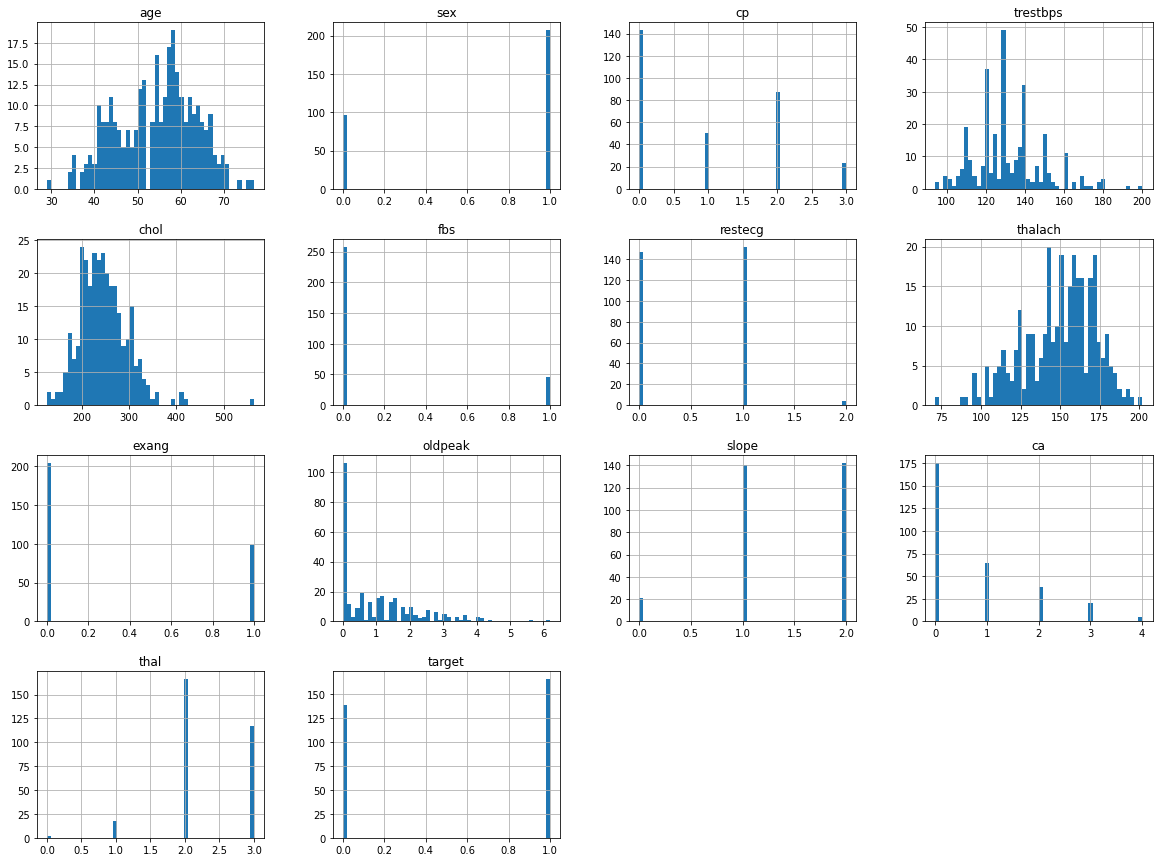

In [7]:
#Generate the histograms for all variables to look at the distribution and identify any possible outliers
%matplotlib inline 
import matplotlib.pyplot as plt
heart_disease.hist(bins=50, figsize=(20,15))
plt.show()


Now lets see what we can learn from our data

In [8]:
#Create a correlation matrix for all variables with the target and sort them in descending order.  We note here that there are no strong positive or negative correlations
#The strongest correlations with target are cp, thalach, oldpeak and exang
corr_matrix = heart_disease.corr()
corr_matrix["target"].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

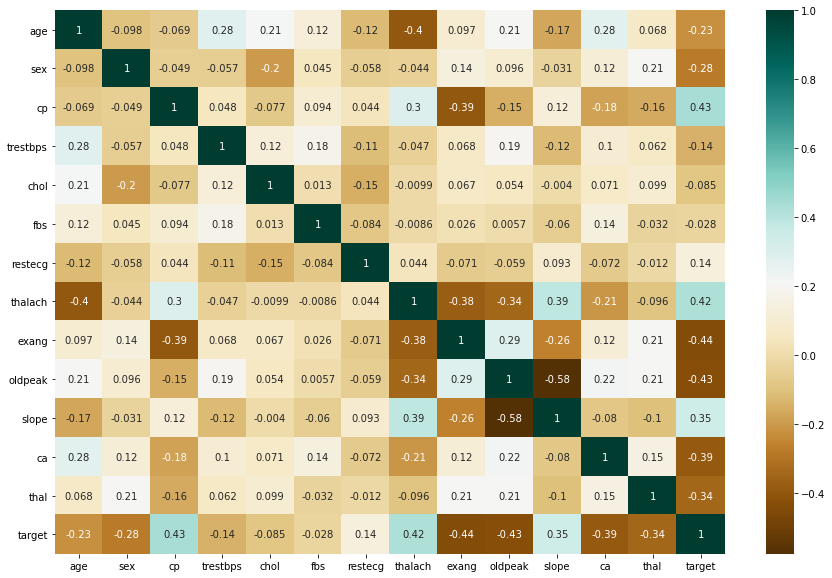

In [9]:
# Create a heatmap of the correlation between variables
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, cmap="BrBG", annot=True);


Lets look at the distibution by gender and target and then at the Target and variables that correlation analysis showed might be related

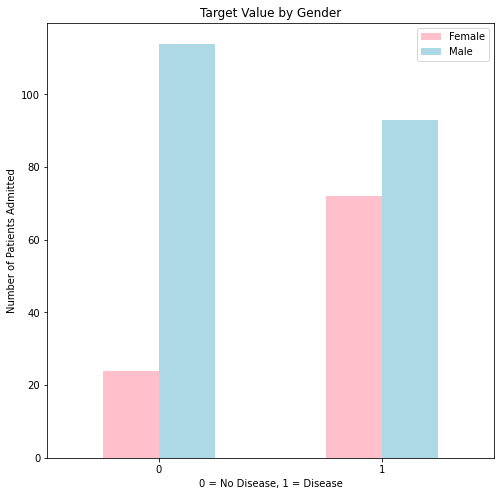

In [10]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar", figsize=(8,8), color=["pink","lightblue"]);
plt.title("Target Value by Gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of Patients Admitted")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); 

Based on the gender distribution, it appears that proportionately more females were found to have the heart disease.  This contradicts the picture that is normally seen in the clinical settings where the incidence of heart disease during childbearing age in women is lower and only after the menopause it approaches that of males.

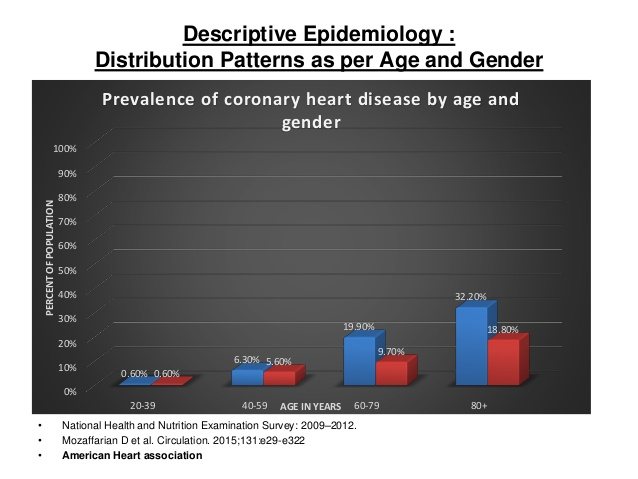 source: https://www.slideshare.net/garimagupta52/coronary-heart-disease-epidemiology

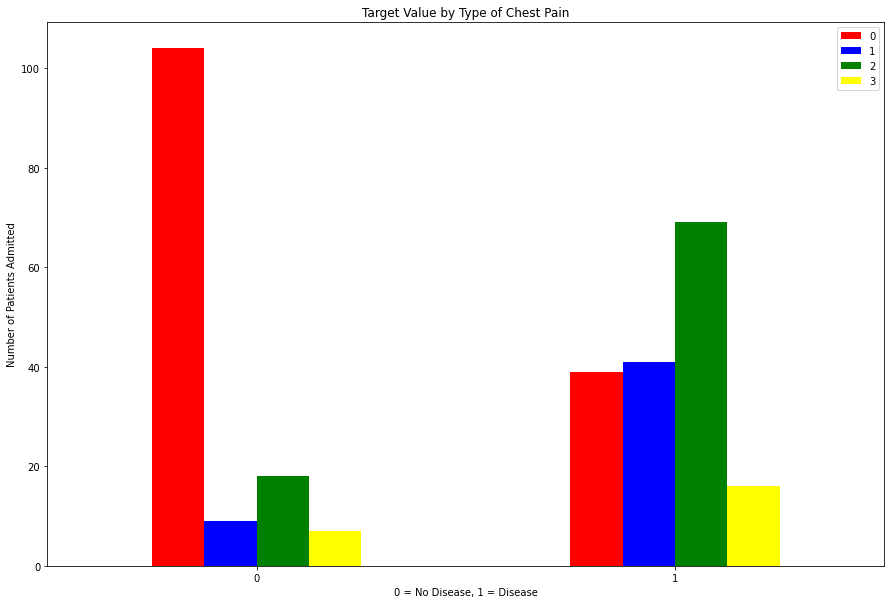

In [11]:
pd.crosstab(heart_disease.target, heart_disease.cp).plot(kind="bar", figsize=(15,10), color=["red","blue","green","yellow"]);
plt.title("Target Value by Type of Chest Pain")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Number of Patients Admitted")
plt.legend(["0","1", "2","3"])
plt.xticks(rotation=0); 

Here, we need to understand what each of these types of chest pain mean.  The Kaggle site does not provide detailed explanation.  We see based on these charts that type 0 chest pain (red bar) is related to Target value 0 while chest pain types 2 & 3 (blue 7 green bars) are more common in individuals with Target value 1.  
At the UCI website, where this dataset came from, the following is the definition of each type of chest pain value:
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
It is odd that if Target 1 is presence of heart disaese, vast majority of patients presented with either atypical angina, non-anginal pain or asymotomatic; while for Target = 0 (supposedly absence of heart disaese) the vast majority of patients presented with typical angina pain (the red bar is poking you in the eye!).
Similarly, we can see below the breakdown of old peak and exercise induced angina (exang) by Target.  We note that the correlation is -0.4 in both which does not make any sense if Target 1 is presence of HD and 0 is absence.  Both of these are positively correlated to the heart disease.

For the old peak, we see that for target value 0, the exercise induced ST depression (expected with HD) is larger than with raget value 1.

For the exercise induced angina we are seeing the same odd result whereby the patients with target value 0 (red bar) who supposeddly do not have heart disease are developing angina on exertion.  This last graph has me convinced that somehow the values for the target variable have been swaped.  


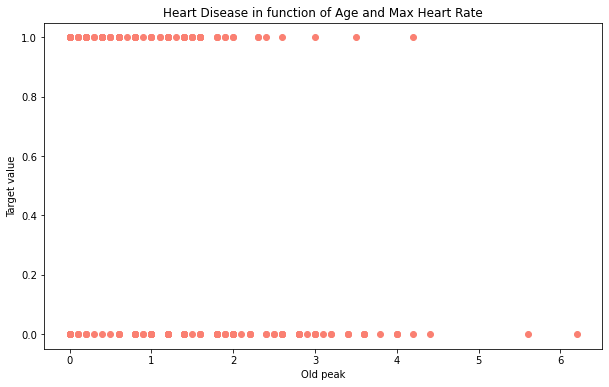

In [12]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(heart_disease.oldpeak, 
            heart_disease.target, 
            c="salmon") # define it as a scatter figure



# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Old peak")
plt.ylabel("Target value");

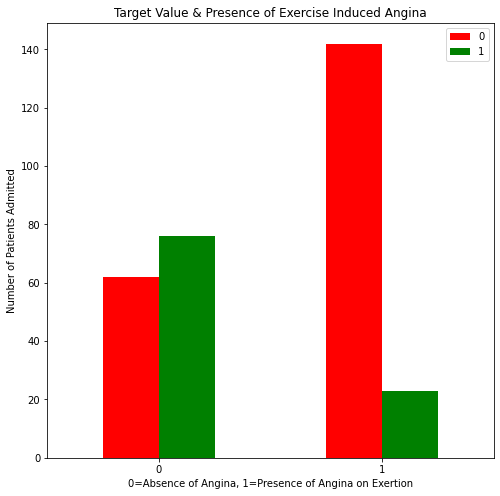

In [13]:
pd.crosstab(heart_disease.target, heart_disease.exang).plot(kind="bar", figsize=(8,8), color=["red","green"]);
plt.title("Target Value & Presence of Exercise Induced Angina")
plt.xlabel ("0=Absence of Angina, 1=Presence of Angina on Exertion")
plt.ylabel("Number of Patients Admitted")
plt.legend(["0","1"])
plt.xticks(rotation=0); 

###### I believe that Target value 0 should be interpreted as presence of heart disease and Target value of 1 as absence.
But lets move on with the Machine Learning Model

First we need to split the dataset into training and test datasets.  We will use 70:30 proportion and will use random sampling with a fixed seed so that our sample does not change every time we run the code.  We also want to segregate the target variable.

In [14]:
#Load the libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [15]:
# Drop the target variable to be left with only independent variables; save target column as new variable
independent = heart_disease.drop("target", axis=1)
dependent = heart_disease.target.values

In [16]:
np.random.seed(142)
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent, dependent,test_size = 0.3)

In [17]:
independent_train.info() #to take a quick look at the dataset that we created - training set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 126 to 277
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 23.2 KB


In [18]:
independent_test.info() #to take a quick look at the dataset that we created - test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1 to 253
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       91 non-null     int64  
 1   sex       91 non-null     int64  
 2   cp        91 non-null     int64  
 3   trestbps  91 non-null     int64  
 4   chol      91 non-null     int64  
 5   fbs       91 non-null     int64  
 6   restecg   91 non-null     int64  
 7   thalach   91 non-null     int64  
 8   exang     91 non-null     int64  
 9   oldpeak   91 non-null     float64
 10  slope     91 non-null     int64  
 11  ca        91 non-null     int64  
 12  thal      91 non-null     int64  
dtypes: float64(1), int64(12)
memory usage: 10.0 KB


In [19]:
#To check that the target set has the same number of entries as the independent variable set
print("dependent variable training file contains ", len(dependent_train), " entries")

dependent variable training file contains  212  entries


In [20]:
print("dependent variable testing file contains ", len(dependent_test), " entries")

dependent variable testing file contains  91  entries


###### Logistic Regression
This model was selected because the model predicts that the instance belongs to a particular class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.
Source: Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron


In [21]:
log_reg = LogisticRegression()
log_reg.fit(independent_train, dependent_train)


C:\Users\Tanja\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The above warning is telling us that we need to scale the data.  It makes sense since we are dealing with 13 variables with different scales, units and possible multicolinearity.  So lets try that, lets use the standard scalar 
Adopted from the following source: https://scikit-learn.org/stable/modules/preprocessing.html

In [22]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(independent_train, dependent_train)  # apply scaling on training data


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [23]:
pipe.score(independent_train, dependent_train) # evaluate the model for training set

0.8584905660377359

In [24]:
pipe.score(independent_test, dependent_test) #test the model

0.8131868131868132

Based on the score our model fits test data pretty good.  For arround 81% of the cases the predicted value and the actual value match.
